In [1]:
import numpy as np  #does mathematical operation
import matplotlib.pyplot as plt #For plotting the graphs
import pandas as pd #making the data frames and import the csv files
import math
import random

In [2]:
from google.colab import drive #to import the google drive data

In [3]:
drive.mount('/content/drive')   # to mount the drive data into the colab cloud and enter the activation code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd /content/drive/"My Drive/ML nishit sir/Ass kmeans" 

/content/drive/My Drive/ML nishit sir/Ass kmeans


Text(0.5, 1.0, 'Original Image')

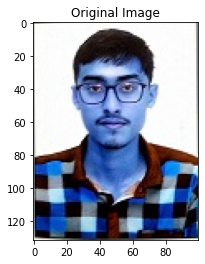

In [5]:
import cv2                          # computer vision version-2 used for read image
import matplotlib.image as mpimg     #used for image plotting
# Read image from Google Drive
original_image = cv2.imread('smitpassport.jpg')
plt.imshow(original_image)
plt.title("Original Image")

In [6]:
original_image   # get pixel value and RGB value

array([[[ 88,  82,  77],
        [121, 115, 110],
        [124, 119, 116],
        ...,
        [238, 236, 235],
        [217, 215, 214],
        [134, 132, 131]],

       [[208, 202, 197],
        [255, 253, 248],
        [255, 255, 252],
        ...,
        [255, 255, 254],
        [236, 234, 233],
        [137, 135, 134]],

       [[188, 183, 180],
        [255, 252, 248],
        [255, 255, 252],
        ...,
        [255, 254, 253],
        [238, 236, 235],
        [131, 129, 128]],

       ...,

       [[224, 221, 216],
        [ 26,  23,  18],
        [  5,   0,   0],
        ...,
        [ 12,  40, 101],
        [  5,  35,  90],
        [ 10,  41,  94]],

       [[231, 232, 222],
        [123, 124, 114],
        [108, 107,  97],
        ...,
        [ 14,  27,  43],
        [ 25,  37,  47],
        [ 41,  54,  62]],

       [[231, 233, 221],
        [240, 242, 230],
        [247, 247, 235],
        ...,
        [239, 243, 237],
        [241, 245, 233],
        [245, 250, 235]]

In [7]:
original_image.shape

(132, 100, 3)

In [8]:
original_image = (original_image/255).reshape(132*100,3)    # limits the value

In [9]:
original_image

array([[0.34509804, 0.32156863, 0.30196078],
       [0.4745098 , 0.45098039, 0.43137255],
       [0.48627451, 0.46666667, 0.45490196],
       ...,
       [0.9372549 , 0.95294118, 0.92941176],
       [0.94509804, 0.96078431, 0.91372549],
       [0.96078431, 0.98039216, 0.92156863]])

In [10]:
#Euclidean Distance
def cal_distance(x1,x2):
    return (sum((x1-x2)**2))**0.5

In [11]:
# get closest centroid to each data
def findClosestCentroid(c,x):
    assign_centroid=[]
    for i in x:
        distance=[]
        for j in c:
            distance.append(cal_distance(i,j))
        assign_centroid.append(np.argmin(distance))
    return assign_centroid

In [12]:
# Calculate new Centroids by calculating mean of each cluster
def cal_centroids(cluster,x):
    new_centroid=[]
    new_df1=pd.concat([pd.DataFrame(x),pd.DataFrame(cluster,columns=['cluster'])],axis=1)
    for c in set(new_df1['cluster']):             #return unique value of cluster (set function used)
        current_cluster = new_df1[new_df1['cluster']==c][new_df1.columns[:-1]]      #considering all X and Y values for particular cluster 'C'
        current_mean = current_cluster.mean(axis=0)
        new_centroid.append(current_mean)

    return new_centroid

In [13]:
epoch=15

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

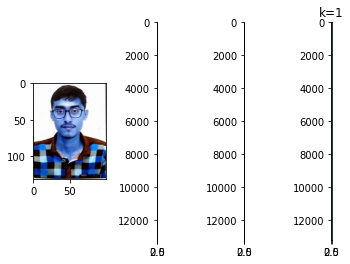

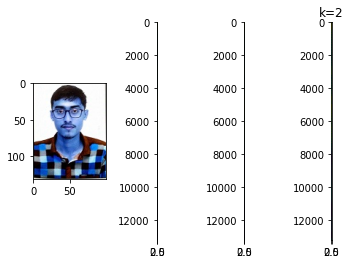

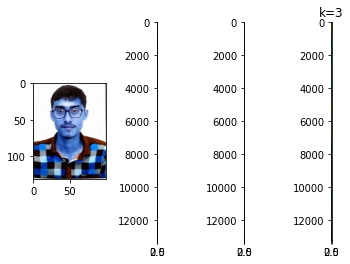

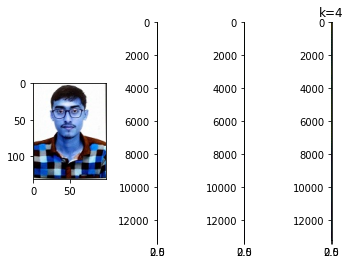

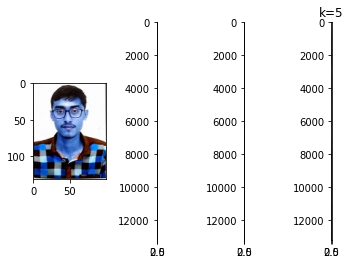

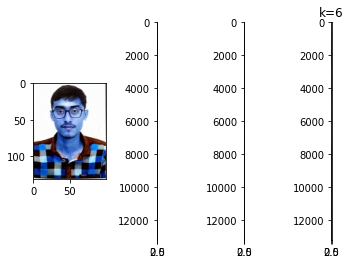

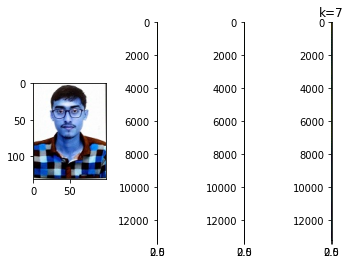

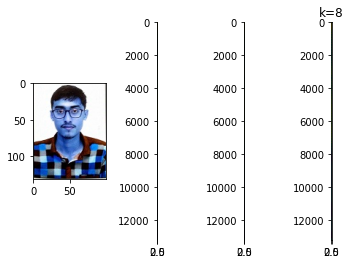

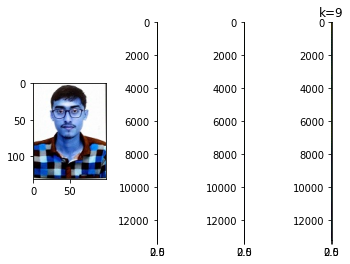

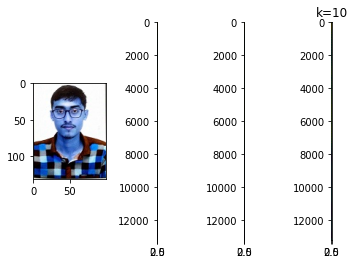

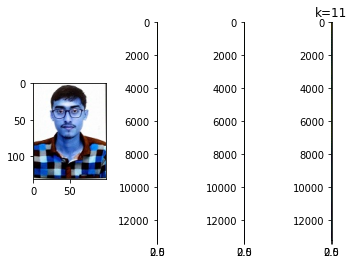

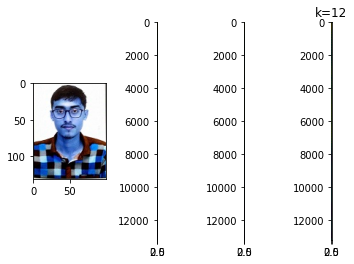

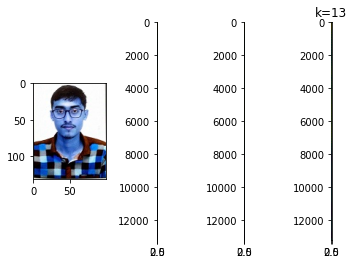

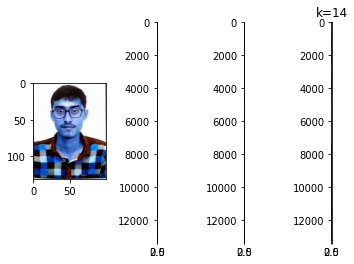

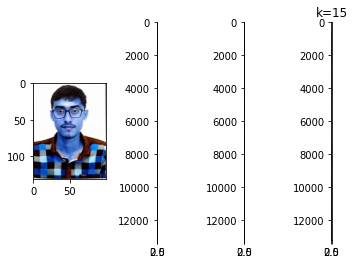

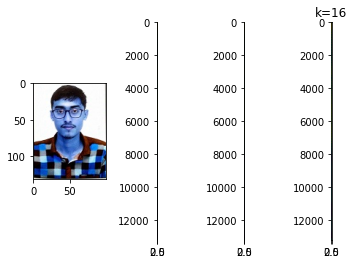

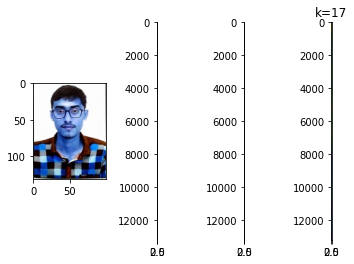

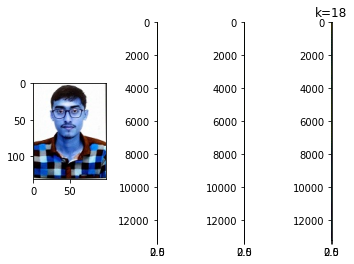

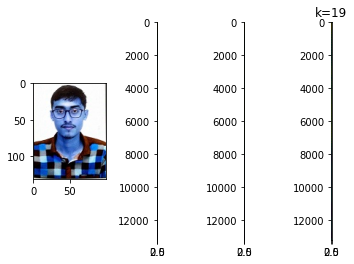

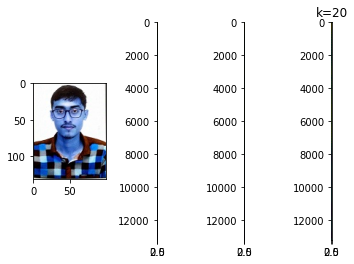

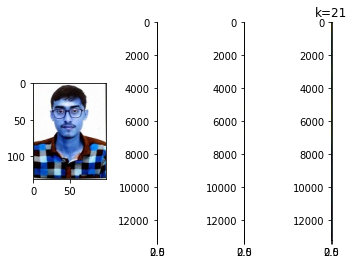

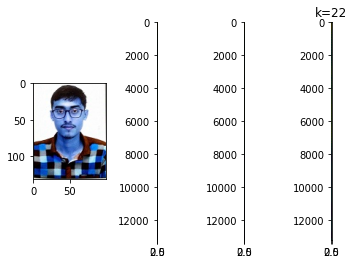

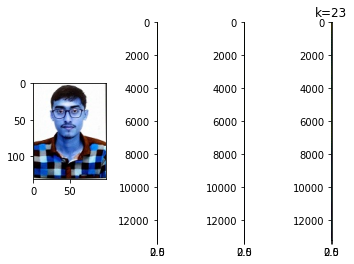

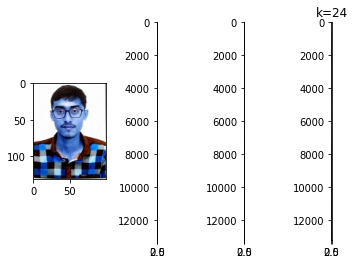

In [14]:
# number of centroids: k range from 1 to 25
for k in range(1,25):
    original_image = (original_image/255).reshape(132*100,3) 

    init_centroids = random.sample(range(0,len(original_image)),k)      # 2nd argument indicate number of centroids

    # get actual value of centroids from index 
    centroids=[]
    for i in init_centroids:
        centroids.append(original_image[i]) 

    # convert dataframe to array
    centroids=np.array(centroids)

    new_centroids_arr= []
    for i in range(epoch):
        #print(i)
        get_centroids = findClosestCentroid(centroids, original_image)
        centroids = cal_centroids(get_centroids, original_image)

        if(i==1):
            new_centroids_arr.append(centroids)
        if(i== (epoch//2)):
            new_centroids_arr.append(centroids)

    # get image when  number of epoch=1
    recovered_img_1 = original_image.copy()
    for i in range(len(original_image)):
        recovered_img_1[i] = new_centroids_arr[0][get_centroids[i]]
    recovered_img_1 = recovered_img_1.reshape(132*100,3)

    # get image when  number of epoch= (epoch/2)
    recovered_img_2 = original_image.copy()
    for i in range(len(original_image)):
        recovered_img_2[i] = new_centroids_arr[1][get_centroids[i]]
    recovered_img_2 = recovered_img_2.reshape(132*100,3)

    # get image when  number of epoch='epoch'
    recovered_img_3 = original_image.copy()
    for i in range(len(original_image)):
        recovered_img_3[i] = centroids[get_centroids[i]]
    recovered_img_3 = recovered_img_3.reshape(132*100,3)

    # Plotting Images 
    original_image = cv2.imread('smitpassport.jpg')
    fig,ax = plt.subplots(1,4)
    plt.title('k='+str(k))
    ax[0].imshow(original_image)
    ax[1].imshow(recovered_img_1)
    ax[2].imshow(recovered_img_2)
    ax[3].imshow(recovered_img_3)